# Script to plot images from h5file spectral encoder spectromter at SwissFEL Aramis
- General documentation https://docs.google.com/document/d/1Ll3_WsHzFwuvL-sWgqWQUSYKJRgFG6W7PWY-NJ40WS0/edit?usp=sharing
- User guide ADD WEBSITE
- Comments to christopher.arrell@psi.ch

### Setup

In [5]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def LoadData(fn):
    with h5.File(fn, 'r') as f:
        img = f[Image_H5_name][:]
        print('h5 file keys: ',f.keys(),'\nImage array size: ',img.shape )
    return img

### User inputs

In [35]:
Fn_FEL= '/sf/alvra/data/p16585/res/PhotoDiag/psen_images/psen_30umYAG_withFEL_0001_0000.h5'
Fn_noFEL= '/sf/alvra/data/p16585/res/PhotoDiag/psen_images/psen_30umYAG_noFEL_0001_0000.h5'

Image_H5_name = 'img'

### Setup and load data

In [36]:
Images_FEL = LoadData(Fn_FEL)
if Fn_noFEL:
    Images_noFEL = LoadData(Fn_noFEL)

h5 file keys:  <KeysViewHDF5 ['img', 'mot']> 
Image array size:  (100, 1562, 2560)
h5 file keys:  <KeysViewHDF5 ['img', 'mot']> 
Image array size:  (100, 1562, 2560)


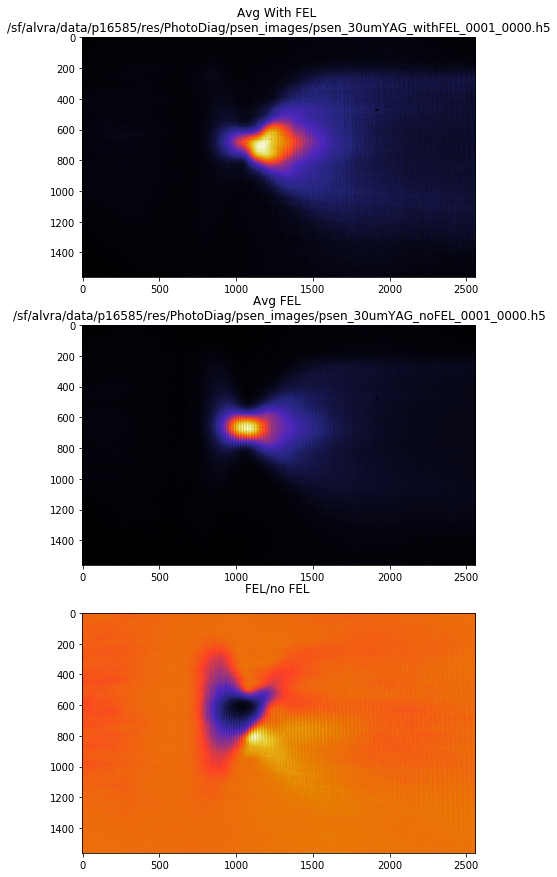

In [39]:
if Fn_noFEL:
    plt.figure(figsize=[15,15])
    plt.subplot(311)
    plt.title('Avg With FEL \n'+Fn_FEL)
    plt.imshow(Images_FEL[:,:,:].mean(axis=0),cmap='CMRmap')
    plt.subplot(312)
    plt.title('Avg FEL \n'+Fn_noFEL)
    plt.imshow(Images_noFEL[:,:,:].mean(axis=0),cmap='CMRmap')
    plt.subplot(313)
    plt.title('FEL/no FEL \n')
    plt.imshow(Images_FEL[:,:,:].mean(axis=0)/Images_noFEL[:,:,:].mean(axis=0),cmap='CMRmap')
else:
    plt.title('With FEL \n'+Fn_FEL)
    plt.imshow(Images_FEL[:,:,:].mean(axis=0))   

### Spatial signal dependence

In [151]:
Signal = Images_FEL[:,:,:].mean(axis=0)/Images_noFEL[:,:,:].mean(axis=0)
ROI_y = [200,1100]
ROI_x = [500,2000]
slices_y = 10
slices_x = 10
Signal = Signal[ROI_y[0]:ROI_y[1],ROI_x[0]:ROI_x[1]]
ROI_y = [0,900]
ROI_x = [200,1000]
regions_x = np.linspace(ROI_x[0], ROI_x[1],slices_x, endpoint=False)
regions_y= np.linspace(ROI_y[0], ROI_y[1],slices_y, endpoint=False)

In [152]:
Slices_x = []
label_x = []
for counter, i in enumerate(regions_x):
    if counter <slices_x-1:
        Slices_x.append(Signal[:,int(regions_x[counter]):int(regions_x[counter+1])].sum(axis=1))
        label_x.append(str(int(regions_x[counter]))+':'+str(int(regions_x[counter+1])))
    if counter == slices_x-1:
        Slices_x.append(Signal[:,int(regions_x[counter]):ROI_x[1]].sum(axis=1))
        label_x.append(str(int(regions_x[counter]))+':'+str(ROI_x[1]))
Slices_x = np.asarray(Slices_x)

Slices_y = []
label_y = []

for counter, i in enumerate(regions_y):
    if counter <slices_y-1:
        Slices_y.append(Signal[int(regions_y[counter]):int(regions_y[counter+1]),:].sum(axis=0))
        label_y.append(str(int(regions_y[counter]))+':'+str(int(regions_y[counter+1])))

    if counter == slices_y-1:
        Slices_y.append(Signal[int(regions_y[counter]):ROI_y[1],:].sum(axis=0))
        label_y.append(str(int(regions_y[counter]))+':'+str(ROI_y[1]))

Slices_y = np.asarray(Slices_y)

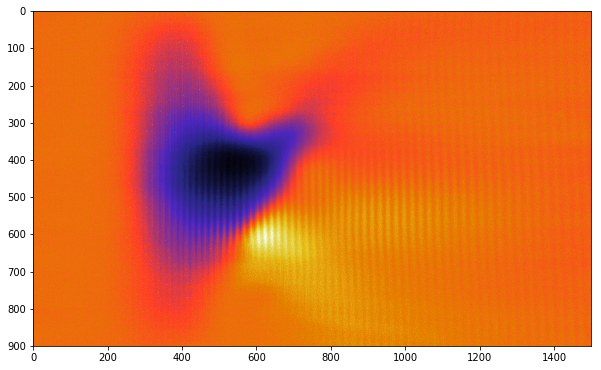

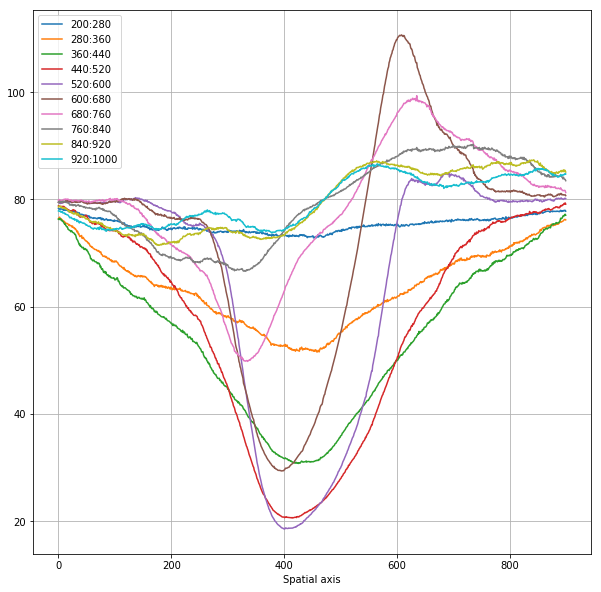

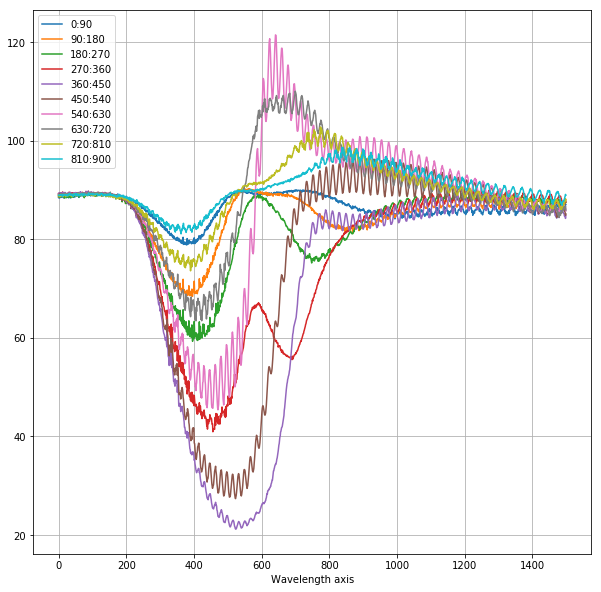

In [154]:
plt.figure(figsize=[10,10])
plt.imshow(Signal,cmap='CMRmap')

plt.figure(figsize=[10,10])
for i in range(0,Slices_x.shape[0]):
    plt.plot(Slices_x[i], label = label_x[i])
plt.grid(True)
plt.xlabel('Spatial axis')
plt.legend(loc = 2)

plt.figure(figsize=[10,10])
for i in range(0,Slices_y.shape[0]):
    plt.plot(Slices_y[i], label = label_y[i])
plt.grid(True)
plt.xlabel('Wavelength axis')
plt.legend(loc = 2)